In [0]:
%tensorflow_version 1.x

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/Datasets/Lunar_Rock

/content/drive/My Drive/Datasets/Lunar_Rock


In [0]:
train_data_dir='Train Images'
img_height=150
img_width=150
batch_size=32
nb_epochs=100

In [5]:
from tensorflow.compat.v1.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data



Found 9600 images belonging to 2 classes.
Found 2398 images belonging to 2 classes.


In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, Flatten, MaxPooling2D, Convolution2D
from tensorflow.keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense


In [15]:
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (img_height, img_width, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=32, activation = 'relu'))
classifier.add(Dense(units=1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [0]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
chk_path='training_lunar_rock_shallow/cp-{epoch:04d}.ckpt'
chk_dir=os.path.dirname(chk_path)

cp_callback=ModelCheckpoint(chk_path, save_weights_only=True,
                                              verbose=1)

In [18]:
history=classifier.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs,verbose=1, 
    callbacks=[cp_callback])

Epoch 1/100
 74/300 [======>.......................] - ETA: 57:04 - loss: 0.1702 - acc: 0.9295
Epoch 00001: saving model to training_lunar_rock_shallow/cp-0001.ckpt
300/300 [==============================] - 5718s 19s/step - loss: 0.3492 - acc: 0.8352 - val_loss: 0.1702 - val_acc: 0.9295
Epoch 2/100
 74/300 [======>.......................] - ETA: 1:30 - loss: 0.0890 - acc: 0.9717
Epoch 00002: saving model to training_lunar_rock_shallow/cp-0002.ckpt
300/300 [==============================] - 136s 455ms/step - loss: 0.1315 - acc: 0.9498 - val_loss: 0.0890 - val_acc: 0.9717
Epoch 3/100
 74/300 [======>.......................] - ETA: 1:29 - loss: 0.0756 - acc: 0.9738
Epoch 00003: saving model to training_lunar_rock_shallow/cp-0003.ckpt
300/300 [==============================] - 135s 451ms/step - loss: 0.0939 - acc: 0.9660 - val_loss: 0.0756 - val_acc: 0.9738
Epoch 4/100
 74/300 [======>.......................] - ETA: 1:33 - loss: 0.0402 - acc: 0.9894
Epoch 00004: saving model to training_l

In [0]:
# model.save('lunar_rock_100_epoch_shallow.h5')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


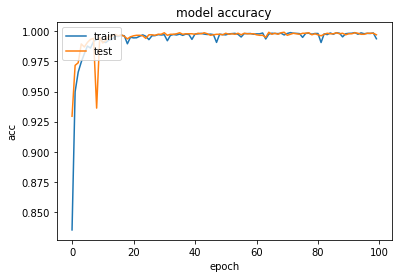

In [22]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

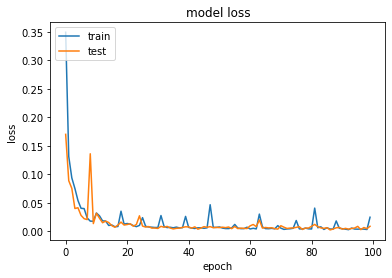

In [23]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
 ## Training with K-fold cross validation
kf = KFold(n_splits=k_folds, random_state=None, shuffle=True)
kf.get_n_splits(images_file_paths)

X = np.array(images_file_paths)
y = np.array(class_labels)

i = 1
for train_index, test_index in kf.split(X):
    trainData = X[train_index]
    testData = X[test_index]
    trainLabels = y[train_index]
    testLabels = y[test_index]

    print("=========================================")
    print("====== K Fold Validation step => %d/%d =======" % (i,k_folds))
    print("=========================================")

    trainGenerator = Generator(trainData,trainLabels,batchSize=batchSize,imageSize=imageSize,augment=True,grayMode=grayMode)
    valGenerator = Generator(testData,testLabels,batchSize=batchSize,imageSize=imageSize,augment=False,grayMode=grayMode)

    try: 
        model = load_model(weights_path, compile=True)

    except Exception as OSError:
        pass

    model.fit_generator(
            trainGenerator,
            steps_per_epoch=len(trainData),
            epochs=epochs,
            validation_data=valGenerator,
            validation_steps=len(testData))
    i+=1